# Studying the Small Scale Environment
## Relating Dwarf Galaxy Properties to Their Distance to Nearest Neighbor 

## Reading in NSA FITS file

### NSA (NASA Sloan Atlas)


 

In [2]:
#import astropy

from astropy.io import fits

from astropy.table import Table


In [3]:
#Reading in data file

fits_NSA_file = r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdul = fits.open(fits_NSA_file) 

In [4]:
hdul.info()

Filename: C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    330   641409R x 141C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K]   


In [5]:
# Names of all the collumns in the data base

data_header = hdul[1].header
data_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4091 / length of dimension 1                          
NAXIS2  =               641409 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  141 / number of table fields                         
TTYPE1  = 'IAUNAME '                                                            
TFORM1  = '19A     '                                                            
TTYPE2  = 'SUBDIR  '                                                            
TFORM2  = '27A     '                                                            
TTYPE3  = 'RA      '        

In [6]:
# test of selecting an area of data (not needed)

data = hdul[1].data

data['ELPETRO_ABSMAG'][:,4]   #test

array([-19.303656, -19.976496, -18.431812, ..., -18.258053, -17.241238,
       -19.631086], dtype=float32)

### Creating a smaller data table with only data I will need

In [7]:
data_table = Table()

data_table['RA'] = data['RA']
data_table['DEC'] = data['DEC']
data_table['Z'] = data['Z']
data_table['ELPETRO_ABSMAG_r'] = data['ELPETRO_ABSMAG'][:,4]
data_table['u_r'] = data['u_r']
data_table['sSFR'] = data['sSFR']
data_table['HImass'] = data['HImass']
data_table['flag3727'] = data['flag3727']
data_table['t3'] = data['t3']
data_table['Z12logOH'] = data['Z12logOH']
data_table['Zerr'] = data['Zerr']
data_table['logNO'] = data['logNO']
data_table['NOerr'] = data['NOerr']
data_table['vflag_VF'] = data['vFlag_VF']

In [8]:
data_table[:5] # viewing first 5 rows of data as reference

RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF
float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
146.714215072841,-1.0412800233313741,0.021222278,-19.303656,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9
146.6285851269414,-0.7651620976591762,0.06465632,-19.976496,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2
146.63170644325592,-0.9883467023052999,0.05265425,-18.431812,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2
146.9341288729797,-0.6704053610430766,0.121270485,-21.559162,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9
146.9634997327016,-0.5447758299302171,0.055980586,-19.100992,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2


## 2D (RA, DEC) Plot of Galaxies 

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

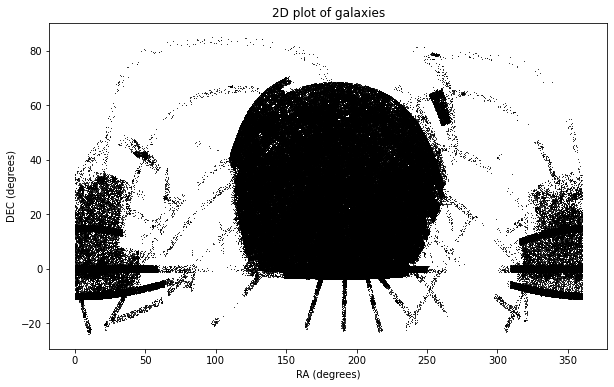

In [16]:
plt.rcParams["figure.figsize"] = (10,6)  #increase size of figure

plt.title('2D plot of galaxies') #title
plt.xlabel('RA (degrees)') #x label
plt.ylabel('DEC (degrees)') #y label

plt.scatter(data_table['RA'], data_table['DEC'], marker='o', c='k', s=1, lw=0)



## 3D Plot Attempt (RA, DEC, Z)

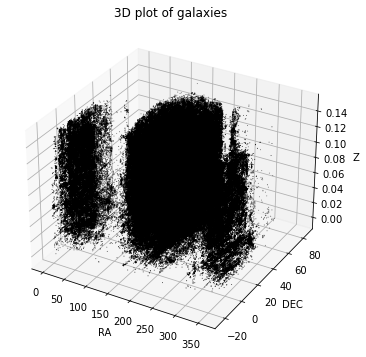

In [19]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table['RA'], data_table['DEC'], data_table['Z'],marker='o', c='k', s=1, lw=0) # (x, y, z)

# labeling Plot
plt.title('3D plot of galaxies')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('Z')

plt.show()



## RA and DEC Equatorial Coords Attempt

using this code as a guide
https://stackoverflow.com/questions/29525356/produce-a-ra-vs-dec-equatorial-coordinates-plot-with-python

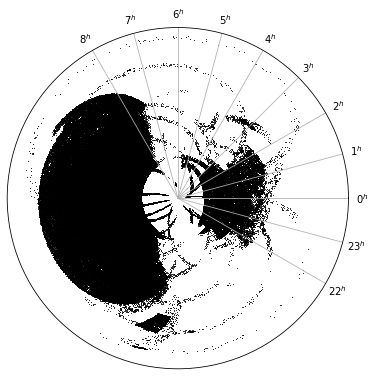

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

    
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

# Read RA, DEC data from file.
ra = data_table['RA']
dec = data_table['DEC']
# Convert RA from decimal degrees to radians.
ra = [x / 180.0 * 3.141593 for x in ra]

# Make plot.
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 2)
# Position plot in figure using gridspec.
ax = plt.subplot(gs[0], polar=True)

#ax.set_ylim(-90, -55)

# Set x,y ticks (this is not correctly set up for my plot)

angs = np.array([330., 345., 0., 15., 30., 45., 60., 75., 90., 105., 120.])
plt.xticks(angs * np.pi / 180., fontsize=8)
plt.yticks(np.arange(-80, -59, 10), fontsize=8)
ax.set_rlabel_position(120)
ax.set_xticklabels(['$22^h$', '$23^h$', '$0^h$', '$1^h$', '$2^h$', '$3^h$',
    '$4^h$', '$5^h$', '$6^h$', '$7^h$', '$8^h$'], fontsize=10)
ax.set_yticklabels(['$-80^{\circ}$', '$-70^{\circ}$', '$-60^{\circ}$'],
    fontsize=10)

# Plot points.
ax.scatter(ra, dec, marker='o', c='k', s=1, lw=0.)

# this is still directly from example code (not useable yet)
'''
# Use this block to generate colored points with a colorbar.
cm = plt.cm.get_cmap('RdYlBu_r')
z = np.random.random((len(ra), 1))  # RGB values
SC = ax.scatter(ra, dec, marker='o', c=z, s=10, lw=0., cmap=cm)
# Colorbar
cbar = plt.colorbar(SC, shrink=1., pad=0.05)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('colorbar', fontsize=8)
'''

# Output png file. (can uncomment if want to save figure)
#fig.tight_layout()
#plt.savefig('ra_dec_plot.png', dpi=300)

## Galatic Coordinate Attempt 

using this a guide https://astronomy.stackexchange.com/questions/32601/how-do-i-plot-galactic-coordinates-using-matplotlib-and-astropy-in-python

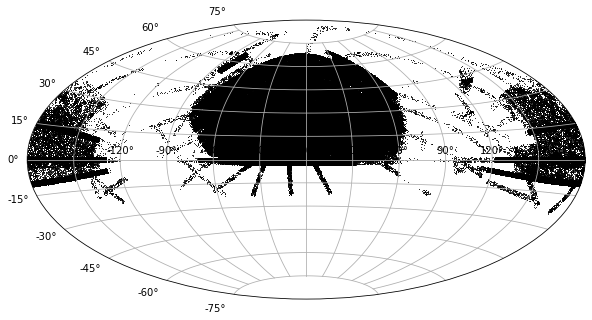

In [18]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord


eq = SkyCoord(180-data_table['RA'], data_table['DEC'], unit=u.deg)
gal = eq.galactic

gal = SkyCoord(180-data_table['RA'], data_table['DEC'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code


In [ ]:
hdul.close() #closes file